In [38]:
import numpy as np
import csv
import time
import matplotlib.pyplot as plt

csv_filename = 'digits.csv'
with open(csv_filename) as f:
    reader = csv.reader(f)
    lst = list(reader)

In [39]:
array = np.array(lst)
print(array)

[['label' '0x0' '0x1' ... '13x11' '13x12' '13x13']
 ['7' '0' '0' ... '0' '0' '0']
 ['3' '0' '0' ... '0' '0' '0']
 ...
 ['7' '0' '0' ... '0' '0' '0']
 ['2' '0' '0' ... '0' '0' '0']
 ['5' '0' '0' ... '0' '0' '0']]


In [40]:
array1 = np.delete(array, 0, axis=0)
print(array1)

[['7' '0' '0' ... '0' '0' '0']
 ['3' '0' '0' ... '0' '0' '0']
 ['8' '0' '0' ... '0' '0' '0']
 ...
 ['7' '0' '0' ... '0' '0' '0']
 ['2' '0' '0' ... '0' '0' '0']
 ['5' '0' '0' ... '0' '0' '0']]


In [41]:
num_row = np.size(array1, axis = 0)
num_colomn = np.size(array1, axis = 1)
print(num_row, num_colomn)

6000 197


In [42]:
arr_img = np.delete(array1, 0, axis = 1)
print(arr_img)

[['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ...
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']
 ['0' '0' '0' ... '0' '0' '0']]


In [43]:
#labels
label = array1[:, 0]
print(label)

['7' '3' '8' ... '7' '2' '5']


In [44]:
X = arr_img.astype(np.int64)
y = label.astype(np.int64)
print(X, y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] [7 3 8 ... 7 2 5]


In [45]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # scaler.fit(X)
# X = scaler.fit_transform(X)
# print(X)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [47]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support

num_predic = 10
def train_fuc(num_hidden_layer, num_nodes, act_func):
    max_itr = 1000
    solver = 'ibfgs'
    t_hls = np.zeros(num_hidden_layer).astype(np.int64)
    i = 0
    while i < num_hidden_layer:
        t_hls[i-1] = num_nodes
        i += 1
    t_hls = tuple(t_hls)
    start = time.time()
    mlp = MLPClassifier (
        hidden_layer_sizes=t_hls,
        activation = act_func,
        max_iter = max_itr        
    )
    mlp.fit(X_train, y_train)
    time_sent=time.time()-start    
    # print(mlp.predict(X_test[120].reshape(1, -1)))
    # # print("Training set score: %f" % mlp.score(X_train, y_train))
    # # print("Test set score: %f" % mlp.score(X_test, y_test))
    y_true = y_test[0:num_predic]
    # y_pred = np.zeros(num_predic).astype(np.int64)
    y_pred = list([])
    k = 0;
    while k < num_predic:
        y_pred.append(mlp.predict(X_test[k].reshape(1, -1)))
        k += 1    
    prfs = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    
    
    return [time_sent, prfs]
    

In [48]:
nodes = [20, 40 ,60 ,80 ,100]
index = 0
time_prfs_relu = list([])
time_prfs_tanh = list([])

for node in nodes:
    time_prfs_relu.append(train_fuc(2, node, 'relu'))
    time_prfs_tanh.append(train_fuc(2, node, 'tanh'))
    index += 1

In [49]:
time_consum_relu = list([])
time_consum_tanh = list([])
prfs1 = list([])
prfs2 = list([])
for x in time_prfs_relu:
    time_consum_relu.append(x[0])
    prfs1.append(x[1])
for x in time_prfs_tanh:
    time_consum_tanh.append(x[0])
    prfs2.append(x[1])

In [50]:
# print(prfs1)
i=0
for x in prfs1:
    print(f"avtive function=relu, node={nodes[i]}:  precision= {x[0]},", f"recall= {x[1]},", f"fscore= {x[2]}")
    i+=1
    # print(f"recall: {x[1]}")
    # print(f"fscore: {x[2]}")
# print(prfs2)

avtive function=relu, node=20:  precision= 0.8571428571428571, recall= 0.8214285714285714, fscore= 0.8367346938775511
avtive function=relu, node=40:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777777
avtive function=relu, node=60:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=relu, node=80:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777778
avtive function=relu, node=100:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777777


In [51]:
i=0
for x in prfs2:
    print(f"avtive function=relu, node={nodes[i]}:  precision= {x[0]},", f"recall= {x[1]},", f"fscore= {x[2]}")
    i+=1

avtive function=relu, node=20:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=relu, node=40:  precision= 0.6666666666666666, recall= 0.7916666666666666, fscore= 0.6984126984126985
avtive function=relu, node=60:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=relu, node=80:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=relu, node=100:  precision= 1.0, recall= 1.0, fscore= 1.0


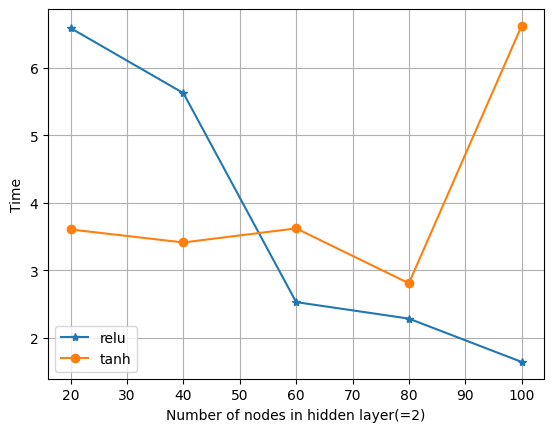

In [52]:
line1 = plt.plot(nodes, time_consum_relu, marker = '*')
line2 = plt.plot(nodes, time_consum_tanh, marker = 'o')
plt.legend(['relu', 'tanh'])
plt.xlabel("Number of nodes in hidden layer(=2)")
plt.ylabel("Time")
plt.grid()
plt.show()

In [53]:
h_layers = [1, 2 ,3 ,4 ,5]
time_prfs_relu1 = list([])
time_prfs_tanh1 = list([])
index1 = 0
for h_layer in h_layers:
    time_prfs_relu1.append(train_fuc(2, node, 'relu'))
    time_prfs_tanh1.append(train_fuc(2, node, 'tanh'))
    index1 += 1

In [54]:
time_consum_relu1 = list([])
time_consum_tanh1 = list([])
prfs11 = list([])
prfs21 = list([])
for x in time_prfs_relu1:
    time_consum_relu1.append(x[0])
    prfs11.append(x[1])
for x in time_prfs_tanh1:
    time_consum_tanh1.append(x[0])
    prfs21.append(x[1])

In [55]:
j=0
for x in prfs11:
    print(f"avtive function=tanh, hidden layers={h_layers[j]}:  precision= {x[0]},", f"recall= {x[1]},", f"fscore= {x[2]}")
    j+=1

avtive function=tanh, hidden layers=1:  precision= 0.5, recall= 0.5714285714285714, fscore= 0.5238095238095238
avtive function=tanh, hidden layers=2:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777778
avtive function=tanh, hidden layers=3:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=tanh, hidden layers=4:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777778
avtive function=tanh, hidden layers=5:  precision= 0.6428571428571429, recall= 0.6785714285714286, fscore= 0.6462585034013605


In [56]:
j=0
for x in prfs21:
    print(f"avtive function=tanh, hidden layers={h_layers[j]}:  precision= {x[0]},", f"recall= {x[1]},", f"fscore= {x[2]}")
    j+=1

avtive function=tanh, hidden layers=1:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=tanh, hidden layers=2:  precision= 0.9166666666666666, recall= 0.9583333333333334, fscore= 0.9206349206349206
avtive function=tanh, hidden layers=3:  precision= 1.0, recall= 1.0, fscore= 1.0
avtive function=tanh, hidden layers=4:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777778
avtive function=tanh, hidden layers=5:  precision= 0.75, recall= 0.8333333333333334, fscore= 0.7777777777777778


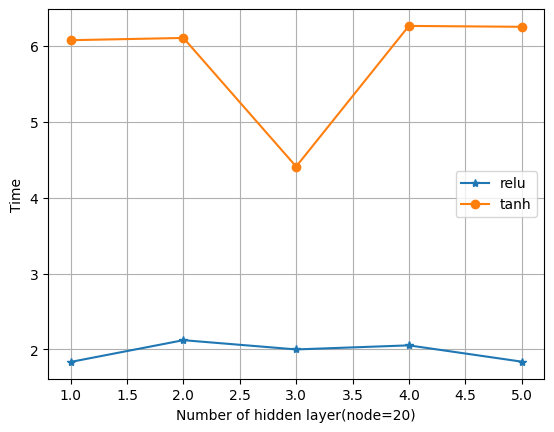

In [57]:
line1_1 = plt.plot(h_layers, time_consum_relu1, marker = '*')
line2_1 = plt.plot(h_layers, time_consum_tanh1, marker = 'o')
plt.legend(['relu', 'tanh'])
plt.xlabel("Number of hidden layer(node=20)")
plt.ylabel("Time")
plt.grid()
plt.show()